<img src="https://github.com/fabian017/Inteligencia-Artifical-2/blob/main/banner-ia2.png?raw=true" >

# **PROYECTO FINAL Inteligencia Artifical 2**

In [ ]:
#@title **code** Montar el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title **code** Librerias
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

#**Carga y procesamiento de imágenes**

In [ ]:
#@title **code** Directorios
Train= '/content/drive/MyDrive/proyectoia2/Data/train/'
Test= '/content/drive/MyDrive/proyectoia2/Data/test/'
Validation= '/content/drive/MyDrive/proyectoia2/Data/valid/'

NTrain= '/content/drive/MyDrive/proyectoia2/NewData/train/'
NTest= '/content/drive/MyDrive/proyectoia2/NewData/test/'
NValidation= '/content/drive/MyDrive/proyectoia2/NewData/valid/'


squamousCarcinoma='squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
normal='normal'
largeCarcinoma='large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
adenocarcinoma='adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'

route='/content/drive/MyDrive/proyectoia2/Data/'
newroute='/content/drive/MyDrive/proyectoia2/NewData/'
data = os.listdir(newroute)
dataAutoencoder=os.listdir(NTrain)
testdataAutoencoder=os.listdir(NTest)
validationAutoencoder=os.listdir(NValidation)

In [ ]:
#@title **code** Eliminar imágenes
'''for i in data:
  newdata = os.listdir(newroute+i)
  for j in newdata:
    xx=os.listdir(newroute+i+'/'+j)
    for a in xx:
      os.remove(newroute+i+'/'+j+'/'+a)
'''

"for i in data:\n  newdata = os.listdir(newroute+i)\n  for j in newdata:\n    xx=os.listdir(newroute+i+'/'+j)\n    for a in xx:\n      os.remove(newroute+i+'/'+j+'/'+a)\n"

In [ ]:
#@title **code** Procesamiento de imágenes
'''
desired_size = 128
for i in data:
  newdata = os.listdir(route+i)
  for j in newdata:
    xx=os.listdir(route+i+'/'+j)
    for y,a in enumerate(xx):
      
      im = cv2.imread(route+i+'/'+j+'/'+a)

      # new_size should be in (width, height) format

      im = cv2.resize(im, (desired_size, desired_size))
      cv2.imwrite(newroute+i+'/'+j+'/'+a,im)
'''   



"\ndesired_size = 128\nfor i in data:\n  newdata = os.listdir(route+i)\n  for j in newdata:\n    xx=os.listdir(route+i+'/'+j)\n    for y,a in enumerate(xx):\n      \n      im = cv2.imread(route+i+'/'+j+'/'+a)\n\n      # new_size should be in (width, height) format\n\n      im = cv2.resize(im, (desired_size, desired_size))\n      cv2.imwrite(newroute+i+'/'+j+'/'+a,im)\n"

In [ ]:
#@title **code** Renombrar las imágenes
'''
for i in data:
  newdata = os.listdir(route+i)
  nombres=["ac","lcc","n","scc"]
  for j in newdata:
    xx=os.listdir(route+i+'/'+j)
    for y,a in enumerate(xx):
      # Absolute path of a file
      old_name = newroute+i+'/'+j+'/'+a
      new_name = newroute+i+'/'+j+'/'+nombres[0]+"_"+str(y)+".png"
      # Renaming the file
      os.rename(old_name, new_name)
    
    nombres.remove(nombres[0])
  '''

'\nfor i in data:\n  newdata = os.listdir(route+i)\n  nombres=["ac","lcc","n","scc"]\n  for j in newdata:\n    xx=os.listdir(route+i+\'/\'+j)\n    for y,a in enumerate(xx):\n      # Absolute path of a file\n      old_name = newroute+i+\'/\'+j+\'/\'+a\n      new_name = newroute+i+\'/\'+j+\'/\'+nombres[0]+"_"+str(y)+".png"\n      # Renaming the file\n      os.rename(old_name, new_name)\n    \n    nombres.remove(nombres[0])\n  '

In [ ]:
#@title **code** Early_stops
early_stops = EarlyStopping(monitor='loss', 
                            min_delta=0, 
                            patience=6, 
                            verbose=2, 
                            mode='auto')

In [ ]:
#@title **code** Data aumentation
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  height_shift_range=0.2,
                                  rotation_range=0.5)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#@title **code** Imágenes de train
IMAGE_SIZE=(128,128)
train_generator = train_datagen.flow_from_directory(
        NTrain,  # this is the target directory
        target_size=IMAGE_SIZE,  # all images will be resized to 150x150
        batch_size=100,
        follow_links=False,
        color_mode="rgb", 
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

Found 613 images belonging to 4 classes.


In [ ]:
#@title **code** Clases o etiquetas
train_generator.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
#@title **code** Imágenes de train para el autoencoder
IMAGE_SIZE=(128,128)
train_generator_autoencoder = train_datagen.flow_from_directory(
        NTrain,  
        target_size=IMAGE_SIZE,  
        batch_size=100,
        color_mode="rgb", 
        class_mode='input')  # since we use binary_crossentropy loss, we need binary labels

Found 613 images belonging to 4 classes.


In [ ]:
#@title **code** Imágenes de test
IMAGE_SIZE=(128,128)
test_generator = test_datagen.flow_from_directory(
        NTest,  # this is the target directory
        target_size=IMAGE_SIZE,  # all images will be resized to 150x150
        batch_size=1,
        color_mode="rgb", 
        class_mode='categorical',
        shuffle=False) 

Found 315 images belonging to 4 classes.


In [ ]:
#@title **code** Imágenes de test para el autoencoder
IMAGE_SIZE=(128,128)
test_generator_autoencoder = test_datagen.flow_from_directory(
        NTest,  # this is the target directory
        target_size=IMAGE_SIZE,  # all images will be resized to 150x150
        batch_size=1,
        color_mode="rgb", 
        class_mode='input',
        shuffle=False) 

Found 315 images belonging to 4 classes.


In [ ]:
test_generator_autoencoder.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
#@title **code** Imágenes de validation
IMAGE_SIZE=(128,128)
validation_generator = validation_datagen.flow_from_directory(
        NValidation,  # this is the target directory
        target_size=IMAGE_SIZE,  # all images will be resized to 150x150
        batch_size=10,
        color_mode="rgb", 
        class_mode='categorical') 


Found 72 images belonging to 4 classes.


In [ ]:
#@title **code** Imágenes de validation para el autoencoder
IMAGE_SIZE=(128,128)
validation_generator_autoencoder = validation_datagen.flow_from_directory(
        NValidation,  # this is the target directory
        target_size=IMAGE_SIZE,  # all images will be resized to 150x150
        batch_size=10,
        color_mode="rgb", 
        class_mode='input') 

Found 72 images belonging to 4 classes.


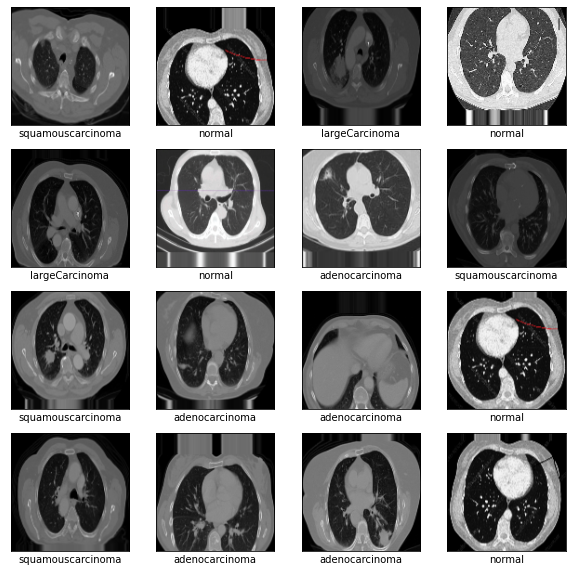

In [ ]:
#@title **code** Imágenes de muestra
def clase(data):
  for x,i in enumerate(data):
    if i ==1:
      return x

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
class_names = ["adenocarcinoma", "largeCarcinoma", "normal","squamouscarcinoma"]


for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_generator[0][0][i*5], cmap=plt.cm.binary)
    plt.xlabel(class_names[clase(train_generator[0][1][i*5])])

#**Implementación de redes convolucionales**

### **Modelo CNN simple**

In [ ]:
#@title **code** Modelo CNN
model_in_do_ba = tf.keras.models.Sequential()
model_in_do_ba.add(tf.keras.layers.Conv2D(32, (3, 3), activation='linear', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model_in_do_ba.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='truncated_normal', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Dropout(0.3))
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_normal', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))
model_in_do_ba.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))
model_in_do_ba.add(tf.keras.layers.Dropout(0.4))
model_in_do_ba.add(tf.keras.layers.Flatten())
model_in_do_ba.add(tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu'))
model_in_do_ba.add(tf.keras.layers.Dropout(0.5))
model_in_do_ba.add(tf.keras.layers.Dense(4, activation='softmax'))
model_in_do_ba.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_7 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 128, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128, 128, 32)     

In [ ]:
#@title **code** Entrenamiento CNN
model_in_do_ba.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])
history = model_in_do_ba.fit(
          train_generator,
          epochs=100,
          batch_size=36,
          validation_data=validation_generator,
           callbacks=early_stops,
           verbose=True
          )

Epoch 1/100
7/7 [==============================] - 199s 33s/step - loss: 15.0830 - accuracy: 0.4339 - val_loss: 79.1850 - val_accuracy: 0.1806
Epoch 2/100
7/7 [==============================] - 4s 538ms/step - loss: 7.4471 - accuracy: 0.4731 - val_loss: 2.3271 - val_accuracy: 0.3194
Epoch 3/100
7/7 [==============================] - 4s 629ms/step - loss: 1.8518 - accuracy: 0.4600 - val_loss: 1.5903 - val_accuracy: 0.3889
Epoch 4/100
7/7 [==============================] - 4s 548ms/step - loss: 1.6641 - accuracy: 0.4894 - val_loss: 2.4859 - val_accuracy: 0.3194
Epoch 5/100
7/7 [==============================] - 4s 542ms/step - loss: 1.3184 - accuracy: 0.5498 - val_loss: 1.3266 - val_accuracy: 0.3194
Epoch 6/100
7/7 [==============================] - 4s 549ms/step - loss: 1.1503 - accuracy: 0.4649 - val_loss: 1.7084 - val_accuracy: 0.3333
Epoch 7/100
7/7 [==============================] - 4s 548ms/step - loss: 1.1936 - accuracy: 0.5139 - val_loss: 2.7396 - val_accuracy: 0.3194
Epoch 8/100

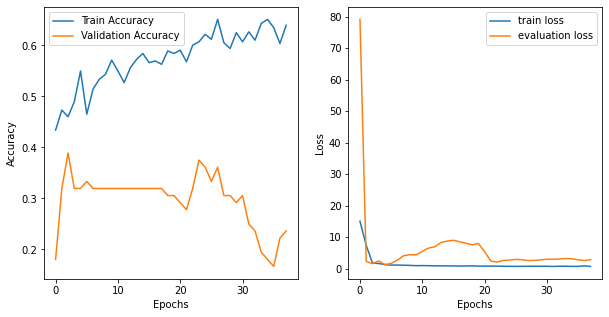

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#@title **code** Procesamiento imágenes test originales
imagenes_test=[]
etiquetas_test=[]
for x,i in enumerate(testdataAutoencoder):
  if i == 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa':
    i='normal'
  elif i=='normal':
    i='squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
  print(i,x)
  for j in os.listdir(NTest+i):
    im = cv2.imread(NTest+i+'/'+j)
    imagenes_test.append(im)
    etiquetas_test.append(x)
  
imagenes_test=np.array(imagenes_test).astype('float32') / 255.0
etiquetas_test=np.array(etiquetas_test)

normal 0
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa 1
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib 2
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa 3


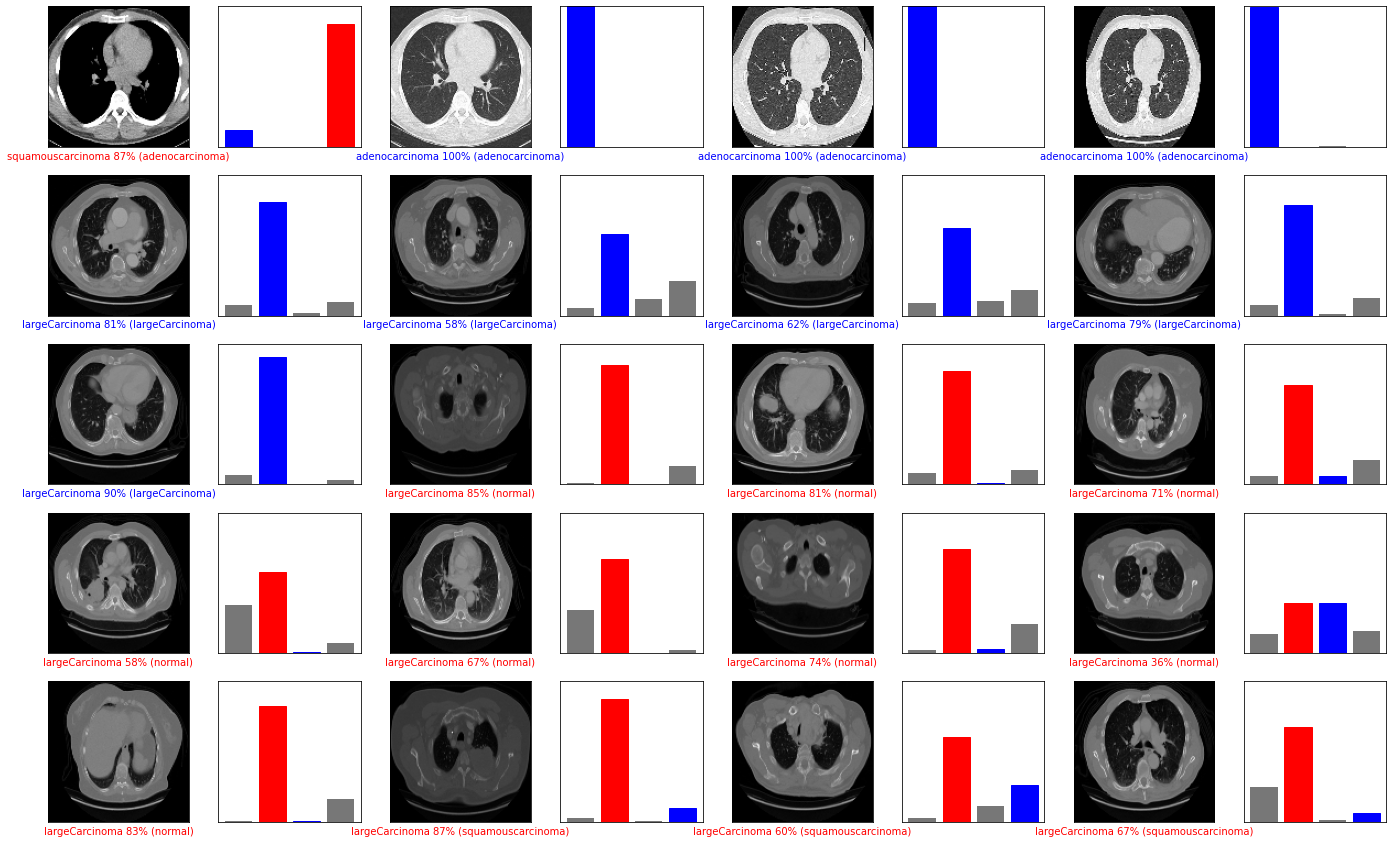

In [ ]:
#@title **code** Gráfica de las predicciones con CNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

predictions = model_in_do_ba.predict(imagenes_test)
labels_pred = np.argmax(predictions, axis=1)

class_names = ["adenocarcinoma", "largeCarcinoma", "normal","squamouscarcinoma"]

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(128, 128,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*3*num_cols, 3*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i*16, predictions, etiquetas_test, imagenes_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i*16, predictions, etiquetas_test)

In [ ]:
#@title **code** Evaluación del modelo
model_in_do_ba.evaluate(test_generator)

315/315 [==============================] - 2s 5ms/step - loss: 3.5064 - accuracy: 0.1778


[3.5063657760620117, 0.17777778208255768]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


(315, 4)
matrix de confusión en test
 [[ 3 51  0  0]
 [ 4 84  1  1]
 [45 62  2 11]
 [ 0 50  1  0]]
verifica número de imágenes en total por fila
[ 54  90 120  51]


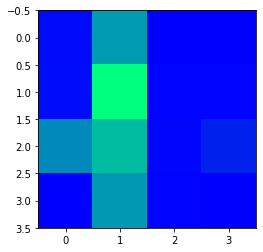

In [ ]:
#@title **code** Predicción
test_generator.reset() 
predictions = model_in_do_ba.predict_generator(test_generator)
# predict the class label
#@title **Matriz De Confusion**
#@markdown Una mejor visión de que tan acertado fueron los valores predecidos con respecto a los valores reales en este caso de red neuronal (DNN), para tener una idea de la proporción entre:
#@markdown * Verdadero positivo
#@markdown * Verdadero negativo
#@markdown * Falso positivo
#@markdown * Falso negativo
from sklearn.metrics import confusion_matrix
print(predictions.shape)
labels_pred = np.argmax(predictions, axis=1)
cm_test = confusion_matrix(etiquetas_test, labels_pred)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))
plt.imshow(cm_test, cmap = "winter")

### **Modelos CNN preentrenados**
**EfficientNetB3**


In [ ]:
#@title **code** Modelo EfficientNetB3
model_A =  tf.keras.applications.EfficientNetB3(input_shape=(128,128,3), weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

43950080/43941136 [==============================] - 1s 0us/step
Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 128, 128, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [ ]:
#@title **code** Agregar capas
new_layer0 = tf.keras.layers.Dense(64, activation='relu')
new_layer1 = tf.keras.layers.Dense(32, activation='relu')
new_layer2 = tf.keras.layers.Dense(16, activation='relu')
dropout = tf.keras.layers.Dropout(0.3)
prediction_layer = tf.keras.layers.Dense(4, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
#@title **code** Adaptar el modelo
model_CNN = tf.keras.Sequential([
  model_A,
  new_layer0,
  dropout,
  new_layer1,
  dropout,
  new_layer2,
  global_average_layer,
  prediction_layer
])

model_CNN.summary()
print("number of layers to train: ", len(model_CNN.trainable_variables))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 4, 4, 1536)       10783535  
                                                                 
 dense_4 (Dense)             (None, 4, 4, 64)          98368     
                                                                 
 dropout_6 (Dropout)         multiple                  0         
                                                                 
 dense_5 (Dense)             (None, 4, 4, 32)          2080      
                                                                 
 dense_6 (Dense)             (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d (G  (None, 16)               0         
 lobalAveragePooling2D)                                          
                                                      

Epoch 1/30
7/7 [==============================] - 17s 1s/step - loss: 1.4232 - accuracy: 0.2349 - val_loss: 1.4360 - val_accuracy: 0.1806
Epoch 2/30
7/7 [==============================] - 4s 516ms/step - loss: 1.4200 - accuracy: 0.2398 - val_loss: 1.4357 - val_accuracy: 0.1806
Epoch 3/30
7/7 [==============================] - 4s 521ms/step - loss: 1.4218 - accuracy: 0.2480 - val_loss: 1.4354 - val_accuracy: 0.1806
Epoch 4/30
7/7 [==============================] - 4s 516ms/step - loss: 1.4175 - accuracy: 0.2414 - val_loss: 1.4350 - val_accuracy: 0.1806
Epoch 5/30
7/7 [==============================] - 4s 525ms/step - loss: 1.4196 - accuracy: 0.2431 - val_loss: 1.4346 - val_accuracy: 0.1806
Epoch 6/30
7/7 [==============================] - 4s 525ms/step - loss: 1.4139 - accuracy: 0.2414 - val_loss: 1.4342 - val_accuracy: 0.1806
Epoch 7/30
7/7 [==============================] - 4s 528ms/step - loss: 1.4200 - accuracy: 0.2496 - val_loss: 1.4339 - val_accuracy: 0.1806
Epoch 8/30
7/7 [======

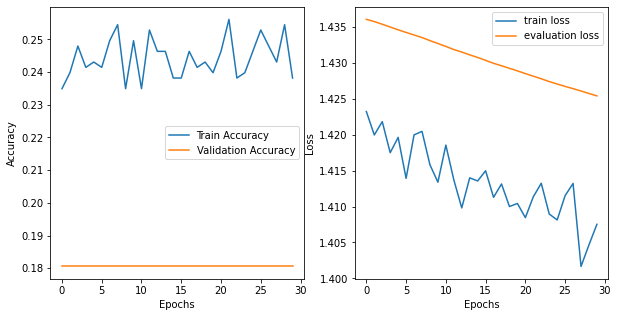

In [ ]:
#@title **code** Entrenando al Modelo EfficientNetB3
import matplotlib.pyplot as plt
learning_rate= 0.0001
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate/10,momentum=0.9)
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = model_CNN.fit(train_generator,epochs=30,verbose=1, batch_size=64,validation_data=validation_generator)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');


In [ ]:
#@title **code** Descongelar capas
model_A.trainable = True
for layer in model_A.layers[:200]:
  layer.trainable =  False
print("Total layers of EfficientNetB3: ", len(model_A.layers))

Total layers of EfficientNetB3:  384


In [ ]:
#@title **code** Mostrando número de capas entrenables
model_CNN.summary()
len(model_CNN.trainable_variables)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 4, 4, 1536)       10783535  
                                                                 
 dense_4 (Dense)             (None, 4, 4, 64)          98368     
                                                                 
 dropout_6 (Dropout)         multiple                  0         
                                                                 
 dense_5 (Dense)             (None, 4, 4, 32)          2080      
                                                                 
 dense_6 (Dense)             (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d (G  (None, 16)               0         
 lobalAveragePooling2D)                                          
                                                      

172

In [ ]:
#@title **code** Ahora, entrenamos el modelo de nuevo
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate/10)
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = model_CNN.fit(train_generator, epochs=20,verbose=1, batch_size=16,validation_data=validation_generator)


Epoch 1/20
7/7 [==============================] - 18s 888ms/step - loss: 1.3758 - accuracy: 0.2953 - val_loss: 1.4265 - val_accuracy: 0.1806
Epoch 2/20
7/7 [==============================] - 4s 652ms/step - loss: 1.2958 - accuracy: 0.3752 - val_loss: 1.4253 - val_accuracy: 0.1806
Epoch 3/20
7/7 [==============================] - 4s 570ms/step - loss: 1.2422 - accuracy: 0.3817 - val_loss: 1.4183 - val_accuracy: 0.1806
Epoch 4/20
7/7 [==============================] - 4s 655ms/step - loss: 1.2530 - accuracy: 0.4176 - val_loss: 1.4124 - val_accuracy: 0.1806
Epoch 5/20
7/7 [==============================] - 4s 572ms/step - loss: 1.2116 - accuracy: 0.4584 - val_loss: 1.4092 - val_accuracy: 0.1806
Epoch 6/20
7/7 [==============================] - 4s 550ms/step - loss: 1.2166 - accuracy: 0.4584 - val_loss: 1.4073 - val_accuracy: 0.1806
Epoch 7/20
7/7 [==============================] - 4s 571ms/step - loss: 1.1558 - accuracy: 0.4780 - val_loss: 1.4069 - val_accuracy: 0.1806
Epoch 8/20
7/7 [===

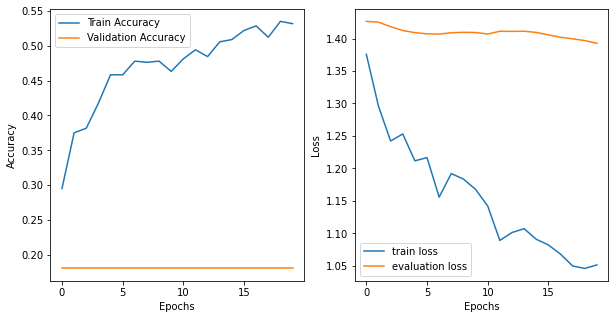

In [ ]:
#@title **code**. Predicción de muestra
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#@title **code** Modificamos el modelo, agregando capas extras
embedding_layer_1 = tf.keras.layers.Dense(256, activation='relu')
embedding_layer_2 = tf.keras.layers.Dense(128, activation='relu')
embedding_layer_p = tf.keras.layers.Dense(4, activation='softmax')

In [ ]:
#@title **code** Construimos el modelos y definimos que capas entrenar
model_A.trainable = False
transfer_model = tf.keras.Sequential(model_CNN.layers[:-1])
transfer_model.add(embedding_layer_1)
transfer_model.add(embedding_layer_2)
transfer_model.add(embedding_layer_p)
transfer_model.summary()
len(transfer_model.trainable_variables)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 4, 4, 1536)       10783535  
                                                                 
 dense_4 (Dense)             (None, 4, 4, 64)          98368     
                                                                 
 dropout_6 (Dropout)         multiple                  0         
                                                                 
 dense_5 (Dense)             (None, 4, 4, 32)          2080      
                                                                 
 dense_6 (Dense)             (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d (G  (None, 16)               0         
 lobalAveragePooling2D)                                          
                                                      

12

In [ ]:
#@title **code** Entrenamiento

opt = tf.keras.optimizers.Adam(lr=learning_rate)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(train_generator, epochs=20,verbose=1, batch_size=32,validation_data=(validation_generator))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
7/7 [==============================] - 15s 871ms/step - loss: 1.3842 - accuracy: 0.3018 - val_loss: 1.3936 - val_accuracy: 0.3194
Epoch 2/20
7/7 [==============================] - 4s 517ms/step - loss: 1.3715 - accuracy: 0.3181 - val_loss: 1.4049 - val_accuracy: 0.3194
Epoch 3/20
7/7 [==============================] - 4s 511ms/step - loss: 1.3656 - accuracy: 0.3181 - val_loss: 1.3769 - val_accuracy: 0.3194
Epoch 4/20
7/7 [==============================] - 4s 525ms/step - loss: 1.3637 - accuracy: 0.2953 - val_loss: 1.3734 - val_accuracy: 0.2917
Epoch 5/20
7/7 [==============================] - 4s 615ms/step - loss: 1.3158 - accuracy: 0.3638 - val_loss: 1.3210 - val_accuracy: 0.4583
Epoch 6/20
7/7 [==============================] - 4s 527ms/step - loss: 1.2890 - accuracy: 0.4111 - val_loss: 1.2396 - val_accuracy: 0.4583
Epoch 7/20
7/7 [==============================] - 4s 524ms/step - loss: 1.2624 - accuracy: 0.4111 - val_loss: 1.1853 - val_accuracy: 0.4583
Epoch 8/20
7/7 [===

In [ ]:
#@title **code** Afinamos algunas otras capas
model_A.trainable = True
print("Total layers of model_B_on_A: ", len(model_A.layers))
for layer in model_A.layers[:250]:
  layer.trainable =  False

transfer_model.summary()
len(transfer_model.trainable_variables)

Total layers of model_B_on_A:  384
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 4, 4, 1536)       10783535  
                                                                 
 dense_4 (Dense)             (None, 4, 4, 64)          98368     
                                                                 
 dropout_6 (Dropout)         multiple                  0         
                                                                 
 dense_5 (Dense)             (None, 4, 4, 32)          2080      
                                                                 
 dense_6 (Dense)             (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d (G  (None, 16)               0         
 lobalAveragePooling2D)                                          
                   

131

In [ ]:
#@title **code**  Compilamos y entrenamos el modelo
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(lr=learning_rate/500)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(train_generator, epochs=200,verbose=1, batch_size=32,validation_data=(validation_generator))


Epoch 1/200
7/7 [==============================] - 16s 888ms/step - loss: 1.2441 - accuracy: 0.4095 - val_loss: 1.3405 - val_accuracy: 0.2639
Epoch 2/200
7/7 [==============================] - 4s 616ms/step - loss: 1.2502 - accuracy: 0.4192 - val_loss: 1.3382 - val_accuracy: 0.2639
Epoch 3/200
7/7 [==============================] - 5s 610ms/step - loss: 1.2721 - accuracy: 0.4062 - val_loss: 1.3271 - val_accuracy: 0.2639
Epoch 4/200
7/7 [==============================] - 4s 639ms/step - loss: 1.2217 - accuracy: 0.4209 - val_loss: 1.3239 - val_accuracy: 0.2639
Epoch 5/200
7/7 [==============================] - 4s 533ms/step - loss: 1.2346 - accuracy: 0.3997 - val_loss: 1.3186 - val_accuracy: 0.2639
Epoch 6/200
7/7 [==============================] - 4s 637ms/step - loss: 1.2138 - accuracy: 0.4388 - val_loss: 1.3098 - val_accuracy: 0.2639
Epoch 7/200
7/7 [==============================] - 4s 534ms/step - loss: 1.2092 - accuracy: 0.4437 - val_loss: 1.3092 - val_accuracy: 0.2639
Epoch 8/200


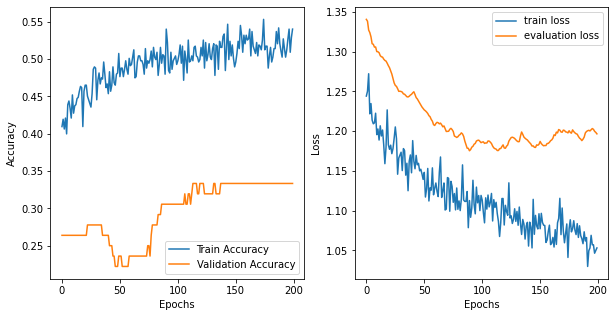

In [ ]:
#@title **code**. Predicción de muestra
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#@title **code** Evaluamos el modelo
transfer_model.evaluate(test_generator)

315/315 [==============================] - 7s 19ms/step - loss: 1.0841 - accuracy: 0.4095


[1.0841448307037354, 0.4095238149166107]

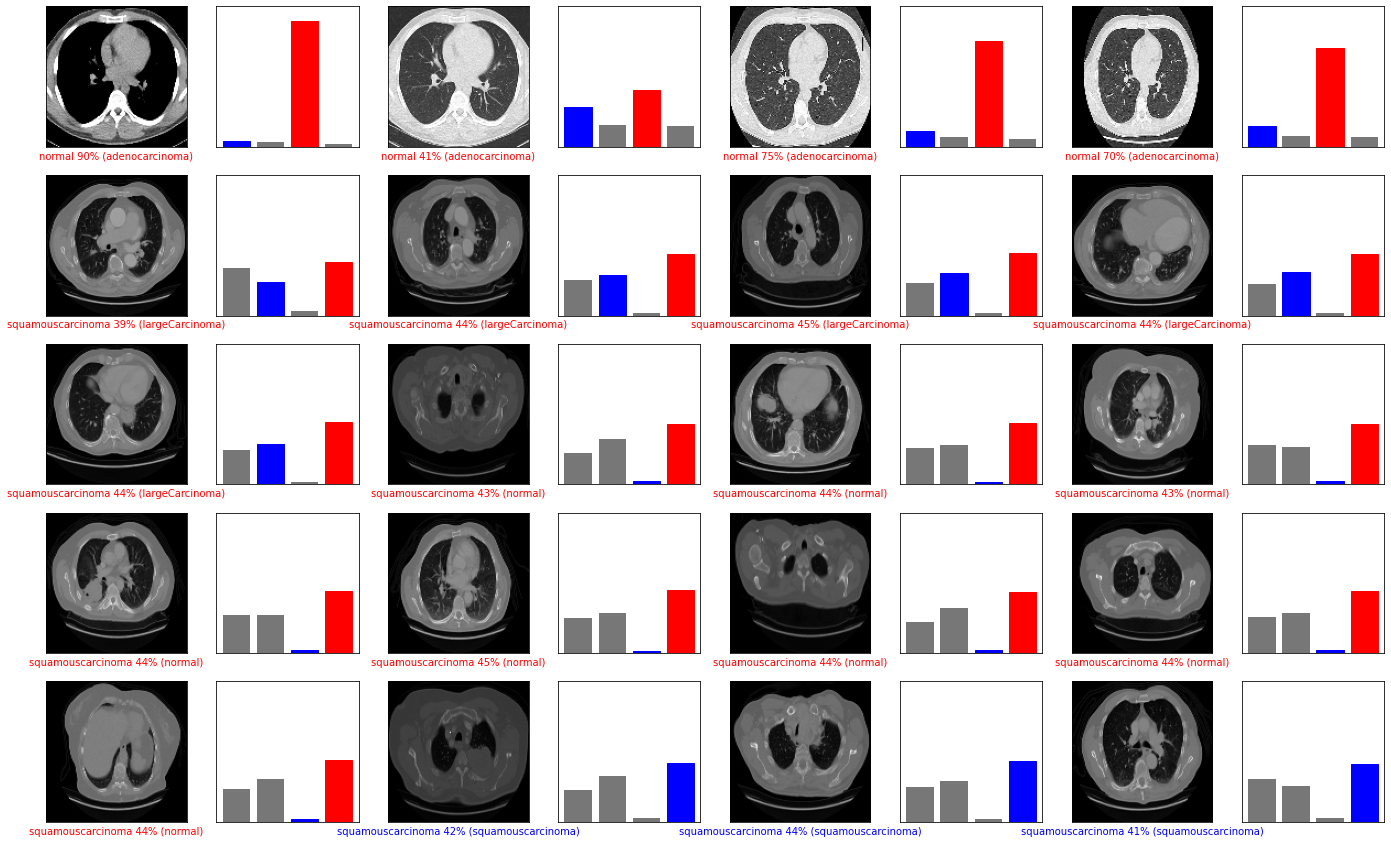

In [ ]:
#@title **code** Gráfica de predicciones
predictions = transfer_model.predict(imagenes_test)
labels_pred = np.argmax(predictions, axis=1)

class_names = ["adenocarcinoma", "largeCarcinoma", "normal","squamouscarcinoma"]

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(128, 128,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*3*num_cols, 3*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i*16, predictions, etiquetas_test, imagenes_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i*16, predictions, etiquetas_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


(315, 4)
matrix de confusión en test
 [[ 0  0  0 54]
 [ 3  0  0 87]
 [14  0 42 64]
 [ 3  0  0 48]]
verifica número de imágenes en total por fila
[ 54  90 120  51]


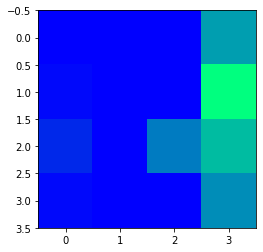

In [ ]:
#@title **code** Predicción
test_generator.reset() 
predictions = transfer_model.predict_generator(test_generator)
# predict the class label
#@title **Matriz De Confusion**
#@markdown Una mejor visión de que tan acertado fueron los valores predecidos con respecto a los valores reales en este caso de red neuronal (DNN), para tener una idea de la proporción entre:
#@markdown * Verdadero positivo
#@markdown * Verdadero negativo
#@markdown * Falso positivo
#@markdown * Falso negativo
from sklearn.metrics import confusion_matrix
print(predictions.shape)
labels_pred = np.argmax(predictions, axis=1)
cm_test = confusion_matrix(etiquetas_test, labels_pred)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))
plt.imshow(cm_test, cmap = "winter")

## **VGG19**

In [ ]:
#@title **code** Modelo VGG19
model_A =  tf.keras.applications.VGG19(input_shape=(128,128,3), weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
#@title **code** Agregar capas
new_layer0 = tf.keras.layers.Dense(64, activation='relu')
new_layer1 = tf.keras.layers.Dense(32, activation='relu')
new_layer2 = tf.keras.layers.Dense(16, activation='relu')
dropout = tf.keras.layers.Dropout(0.3)
prediction_layer = tf.keras.layers.Dense(4, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
#@title **code** Adaptar el modelo
model_CNN = tf.keras.Sequential([
  model_A,
  new_layer0,
  dropout,
  new_layer1,
  dropout,
  new_layer2,
  global_average_layer,
  prediction_layer
])

model_CNN.summary()
print("number of layers to train: ", len(model_CNN.trainable_variables))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 dense_9 (Dense)             (None, 4, 4, 64)          32832     
                                                                 
 dropout_4 (Dropout)         multiple                  0         
                                                                 
 dense_10 (Dense)            (None, 4, 4, 32)          2080      
                                                                 
 dense_11 (Dense)            (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d_1   (None, 16)               0         
 (GlobalAveragePooling2D)                                        
                                                      

Epoch 1/30
7/7 [==============================] - 11s 1s/step - loss: 1.3787 - accuracy: 0.3165 - val_loss: 1.3849 - val_accuracy: 0.3333
Epoch 2/30
7/7 [==============================] - 4s 577ms/step - loss: 1.3881 - accuracy: 0.3116 - val_loss: 1.3844 - val_accuracy: 0.3333
Epoch 3/30
7/7 [==============================] - 4s 590ms/step - loss: 1.3841 - accuracy: 0.3100 - val_loss: 1.3840 - val_accuracy: 0.3333
Epoch 4/30
7/7 [==============================] - 4s 552ms/step - loss: 1.3840 - accuracy: 0.3148 - val_loss: 1.3835 - val_accuracy: 0.3333
Epoch 5/30
7/7 [==============================] - 4s 568ms/step - loss: 1.3819 - accuracy: 0.2985 - val_loss: 1.3829 - val_accuracy: 0.3333
Epoch 6/30
7/7 [==============================] - 4s 576ms/step - loss: 1.3849 - accuracy: 0.3018 - val_loss: 1.3825 - val_accuracy: 0.3333
Epoch 7/30
7/7 [==============================] - 4s 677ms/step - loss: 1.3786 - accuracy: 0.3181 - val_loss: 1.3823 - val_accuracy: 0.3194
Epoch 8/30
7/7 [======

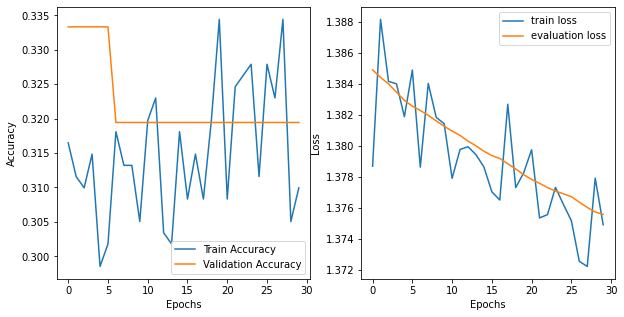

In [ ]:
#@title **code** Entrenamiento del Modelo VGG19
import matplotlib.pyplot as plt
learning_rate= 0.0001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate/10)
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = model_CNN.fit(train_generator,epochs=30,verbose=1, batch_size=64,validation_data=validation_generator)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#@title **code** Descongelar capas
model_A.trainable = True
for layer in model_A.layers[:17]:
  layer.trainable =  False
print("Total ayers of VGG19: ", len(model_A.layers))

Total ayers of Mobilenet:  22


In [ ]:
#@title **code** Mostrando número de capas entrenables
model_CNN.summary()
len(model_CNN.trainable_variables)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 dense_9 (Dense)             (None, 4, 4, 64)          32832     
                                                                 
 dropout_4 (Dropout)         multiple                  0         
                                                                 
 dense_10 (Dense)            (None, 4, 4, 32)          2080      
                                                                 
 dense_11 (Dense)            (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d_1   (None, 16)               0         
 (GlobalAveragePooling2D)                                        
                                                      

16

In [ ]:
#@title **code** Ahora, se entrena de nuevo el modelo
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate/10)
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = model_CNN.fit(train_generator, epochs=20,verbose=1, batch_size=16,validation_data=validation_generator)


Epoch 1/20
7/7 [==============================] - 6s 603ms/step - loss: 1.2738 - accuracy: 0.4241 - val_loss: 1.1124 - val_accuracy: 0.4861
Epoch 2/20
7/7 [==============================] - 4s 664ms/step - loss: 0.9850 - accuracy: 0.5171 - val_loss: 1.0517 - val_accuracy: 0.3889
Epoch 3/20
7/7 [==============================] - 4s 574ms/step - loss: 0.9528 - accuracy: 0.5302 - val_loss: 1.0683 - val_accuracy: 0.4028
Epoch 4/20
7/7 [==============================] - 4s 574ms/step - loss: 0.9329 - accuracy: 0.5514 - val_loss: 1.0505 - val_accuracy: 0.3889
Epoch 5/20
7/7 [==============================] - 4s 559ms/step - loss: 0.8858 - accuracy: 0.6101 - val_loss: 1.0351 - val_accuracy: 0.4306
Epoch 6/20
7/7 [==============================] - 4s 579ms/step - loss: 0.8552 - accuracy: 0.5922 - val_loss: 1.1828 - val_accuracy: 0.4722
Epoch 7/20
7/7 [==============================] - 4s 580ms/step - loss: 0.8205 - accuracy: 0.6558 - val_loss: 1.1496 - val_accuracy: 0.5000
Epoch 8/20
7/7 [====

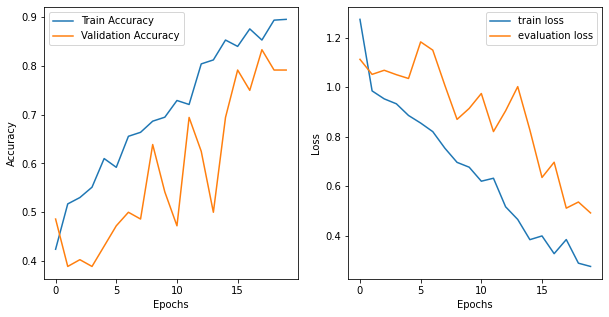

In [ ]:
#@title **code**. Predicción de muestra
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');vgg19

In [ ]:
#@title **code** Modificamos el modelo, agregando capas extras
embedding_layer_1 = tf.keras.layers.Dense(256, activation='relu')
embedding_layer_2 = tf.keras.layers.Dense(128, activation='relu')
embedding_layer_p = tf.keras.layers.Dense(4, activation='softmax')

In [ ]:
#@title **code** Construimos el modelos y definimos que capas entrenar
model_A.trainable = False
transfer_model = tf.keras.Sequential(model_CNN.layers[:-1])
transfer_model.add(embedding_layer_1)
transfer_model.add(embedding_layer_2)
transfer_model.add(embedding_layer_p)
transfer_model.summary()
len(transfer_model.trainable_variables)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 dense_9 (Dense)             (None, 4, 4, 64)          32832     
                                                                 
 dropout_4 (Dropout)         multiple                  0         
                                                                 
 dense_10 (Dense)            (None, 4, 4, 32)          2080      
                                                                 
 dense_11 (Dense)            (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d_1   (None, 16)               0         
 (GlobalAveragePooling2D)                                        
                                                      

12

In [ ]:
#@title **code** Entrenamiento

opt = tf.keras.optimizers.Adam(lr=learning_rate)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(train_generator, epochs=20,verbose=1, batch_size=32,validation_data=(validation_generator))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
7/7 [==============================] - 5s 625ms/step - loss: 0.9011 - accuracy: 0.6623 - val_loss: 0.6844 - val_accuracy: 0.6389
Epoch 2/20
7/7 [==============================] - 4s 585ms/step - loss: 0.2277 - accuracy: 0.9217 - val_loss: 0.5226 - val_accuracy: 0.7917
Epoch 3/20
7/7 [==============================] - 5s 619ms/step - loss: 0.1795 - accuracy: 0.9396 - val_loss: 0.7785 - val_accuracy: 0.7222
Epoch 4/20
7/7 [==============================] - 4s 574ms/step - loss: 0.1751 - accuracy: 0.9347 - val_loss: 0.5576 - val_accuracy: 0.8056
Epoch 5/20
7/7 [==============================] - 4s 573ms/step - loss: 0.1466 - accuracy: 0.9560 - val_loss: 0.5634 - val_accuracy: 0.8194
Epoch 6/20
7/7 [==============================] - 4s 575ms/step - loss: 0.1424 - accuracy: 0.9429 - val_loss: 0.5139 - val_accuracy: 0.8056
Epoch 7/20
7/7 [==============================] - 4s 553ms/step - loss: 0.1189 - accuracy: 0.9576 - val_loss: 0.4983 - val_accuracy: 0.8333
Epoch 8/20
7/7 [====

In [ ]:
#@title **code** Afinamos algunas otras capas
model_A.trainable = True
print("Total ayers of model_B_on_A: ", len(model_A.layers))
for layer in model_A.layers[:19]:
  layer.trainable =  False

transfer_model.summary()
len(transfer_model.trainable_variables)

Total ayers of model_B_on_A:  22
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 dense_9 (Dense)             (None, 4, 4, 64)          32832     
                                                                 
 dropout_4 (Dropout)         multiple                  0         
                                                                 
 dense_10 (Dense)            (None, 4, 4, 32)          2080      
                                                                 
 dense_11 (Dense)            (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d_1   (None, 16)               0         
 (GlobalAveragePooling2D)                                        
                     

16

In [ ]:
#@title **code**  Compilamos y entrenamos el modelo
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(lr=learning_rate/500)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(train_generator, epochs=200,verbose=1, batch_size=32,validation_data=(validation_generator))


Epoch 1/200
7/7 [==============================] - 6s 628ms/step - loss: 0.1058 - accuracy: 0.9576 - val_loss: 0.5127 - val_accuracy: 0.8194
Epoch 2/200
7/7 [==============================] - 4s 572ms/step - loss: 0.1271 - accuracy: 0.9543 - val_loss: 0.4940 - val_accuracy: 0.8056
Epoch 3/200
7/7 [==============================] - 4s 561ms/step - loss: 0.1206 - accuracy: 0.9608 - val_loss: 0.4769 - val_accuracy: 0.8056
Epoch 4/200
7/7 [==============================] - 4s 577ms/step - loss: 0.1107 - accuracy: 0.9560 - val_loss: 0.4602 - val_accuracy: 0.8056
Epoch 5/200
7/7 [==============================] - 4s 549ms/step - loss: 0.1225 - accuracy: 0.9478 - val_loss: 0.4522 - val_accuracy: 0.8194
Epoch 6/200
7/7 [==============================] - 4s 570ms/step - loss: 0.0901 - accuracy: 0.9690 - val_loss: 0.4503 - val_accuracy: 0.8194
Epoch 7/200
7/7 [==============================] - 4s 570ms/step - loss: 0.1025 - accuracy: 0.9674 - val_loss: 0.4503 - val_accuracy: 0.8194
Epoch 8/200
7

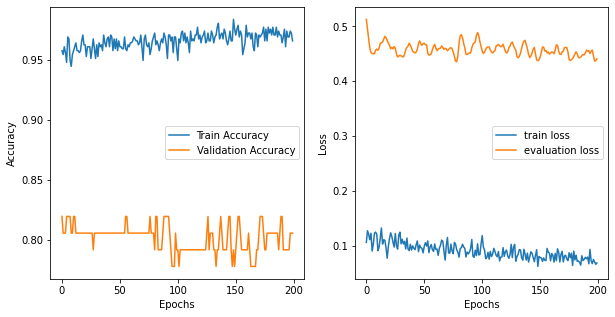

In [ ]:
#@title **code**. Predicción de muestra
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#@title **code** Evaluamos el modelo
transfer_model.evaluate(test_generator)

315/315 [==============================] - 4s 10ms/step - loss: 0.6752 - accuracy: 0.7556


[0.6752229332923889, 0.7555555701255798]

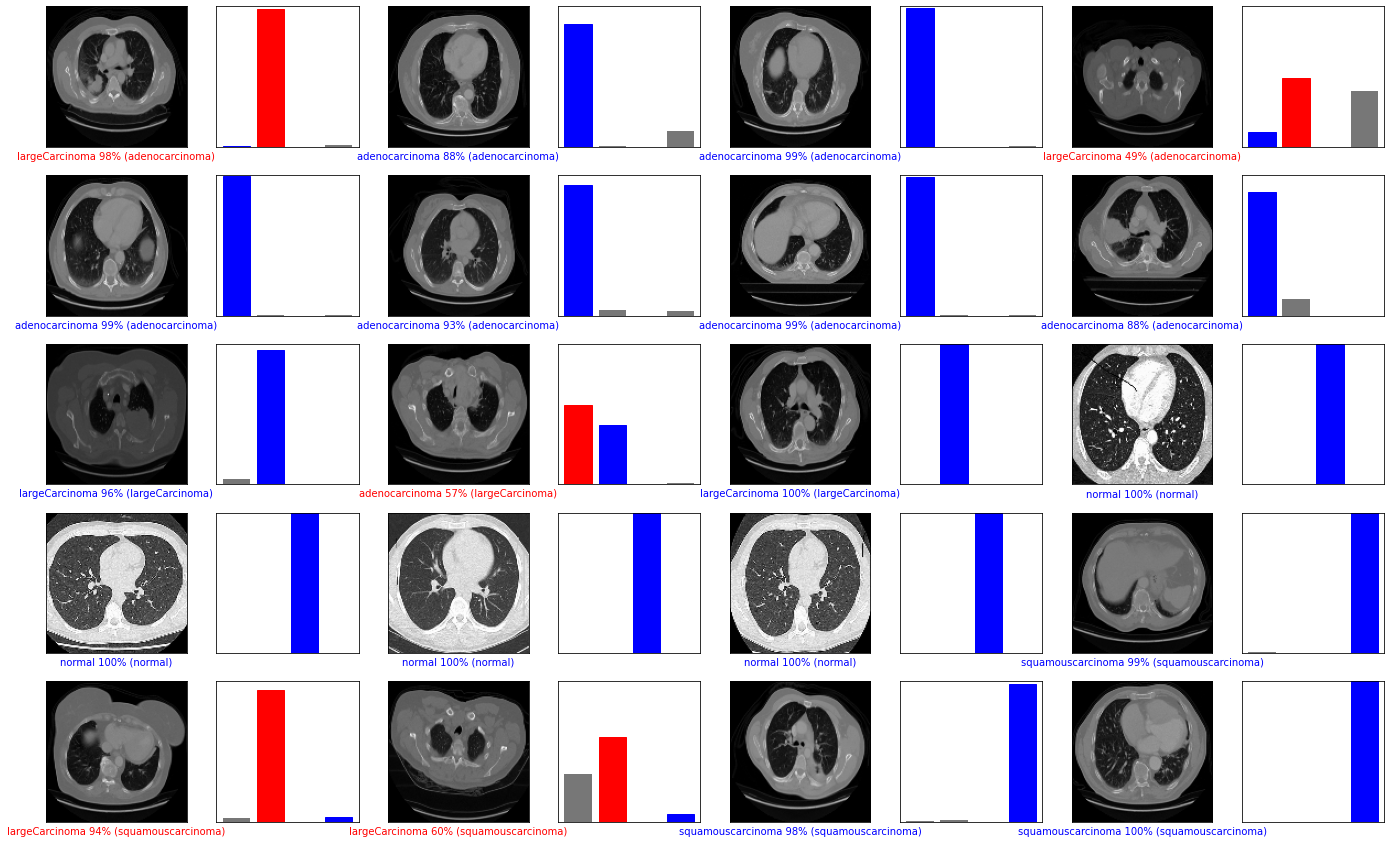

In [ ]:
#@title **code** Gráfica de predicciones
predictions = transfer_model.predict(imagenes_test)
labels_pred = np.argmax(predictions, axis=1)

class_names = ["adenocarcinoma", "largeCarcinoma", "normal","squamouscarcinoma"]

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(128, 128,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*3*num_cols, 3*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i*16, predictions, etiquetas_test, imagenes_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i*16, predictions, etiquetas_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


(315, 4)
matrix de confusión en test
 [[75 26  0 19]
 [ 5 46  0  0]
 [ 2  1 51  0]
 [10 13  1 66]]
verifica número de imágenes en total por fila
[120  51  54  90]


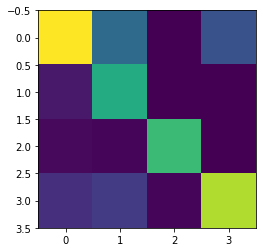

In [ ]:
#@title **code** Predicción
test_generator.reset() 
predictions = transfer_model.predict_generator(test_generator)
# predict the class label
#@title **Matriz De Confusion**
#@markdown Una mejor visión de que tan acertado fueron los valores predecidos con respecto a los valores reales en este caso de red neuronal (DNN), para tener una idea de la proporción entre:
#@markdown * Verdadero positivo
#@markdown * Verdadero negativo
#@markdown * Falso positivo
#@markdown * Falso negativo
from sklearn.metrics import confusion_matrix
print(predictions.shape)
labels_pred = np.argmax(predictions, axis=1)
cm_test = confusion_matrix(etiquetas_test, labels_pred)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))
plt.imshow(cm_test)

## **Modelo InceptionResNetV2**

In [ ]:
#@title **code** Modelo InceptionResNetV2
model_A =  tf.keras.applications.InceptionResNetV2(input_shape=(128,128,3), weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

219070464/219055592 [==============================] - 6s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 63, 63, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_12 (BatchN  (None, 63, 63, 32)  96          ['conv2d_12[0][0]']              
 ormalization)                                                                                    
             

In [ ]:
#@title **code** Agregar capas
new_layer0 = tf.keras.layers.Dense(64, activation='relu')
new_layer1 = tf.keras.layers.Dense(32, activation='relu')
new_layer2 = tf.keras.layers.Dense(16, activation='relu')
dropout = tf.keras.layers.Dropout(0.3)
prediction_layer = tf.keras.layers.Dense(4, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
#@title **code** Adaptar el modelo
model_CNN = tf.keras.Sequential([
  model_A,
  new_layer0,
  dropout,
  new_layer1,
  dropout,
  new_layer2,
  flatten_layer,
  prediction_layer
])

model_CNN.summary()
print("number of layers to train: ", len(model_CNN.trainable_variables))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 dense (Dense)               (None, 4, 4, 64)          32832     
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             (None, 4, 4, 32)          2080      
                                                                 
 dense_2 (Dense)             (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d (G  (None, 16)               0         
 lobalAveragePooling2D)                                          
                                                        

Epoch 1/30
7/7 [==============================] - 90s 10s/step - loss: 1.3950 - accuracy: 0.3181 - val_loss: 1.3898 - val_accuracy: 0.3194
Epoch 2/30
7/7 [==============================] - 4s 584ms/step - loss: 1.3948 - accuracy: 0.3181 - val_loss: 1.3888 - val_accuracy: 0.3194
Epoch 3/30
7/7 [==============================] - 4s 577ms/step - loss: 1.3863 - accuracy: 0.3181 - val_loss: 1.3877 - val_accuracy: 0.3194
Epoch 4/30
7/7 [==============================] - 5s 817ms/step - loss: 1.3872 - accuracy: 0.3181 - val_loss: 1.3873 - val_accuracy: 0.3194
Epoch 5/30
7/7 [==============================] - 7s 999ms/step - loss: 1.3881 - accuracy: 0.3181 - val_loss: 1.3864 - val_accuracy: 0.3194
Epoch 6/30
7/7 [==============================] - 5s 733ms/step - loss: 1.3850 - accuracy: 0.3181 - val_loss: 1.3855 - val_accuracy: 0.3194
Epoch 7/30
7/7 [==============================] - 4s 587ms/step - loss: 1.3840 - accuracy: 0.3181 - val_loss: 1.3849 - val_accuracy: 0.3194
Epoch 8/30
7/7 [=====

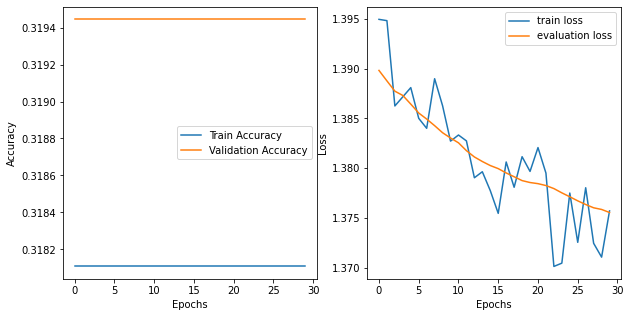

In [ ]:
#@title **code** Entrenamiento del Modelo VGG19
import matplotlib.pyplot as plt
learning_rate= 0.0001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate/10)
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = model_CNN.fit(train_generator,epochs=30,verbose=1, batch_size=64,validation_data=validation_generator)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#@title **code** Descongelar capas
model_A.trainable = True
for layer in model_A.layers[:17]:
  layer.trainable =  False
print("Total ayers of Mobilenet: ", len(model_A.layers))

Total ayers of Mobilenet:  22


In [ ]:
#@title **code** Mostrar número de capas entrenables
model_CNN.summary()
len(model_CNN.trainable_variables)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 dense (Dense)               (None, 4, 4, 64)          32832     
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             (None, 4, 4, 32)          2080      
                                                                 
 dense_2 (Dense)             (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d (G  (None, 16)               0         
 lobalAveragePooling2D)                                          
                                                        

16

In [ ]:
#@title **code** Ahora, se entrena nuevamente el modelo
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate/10)
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = model_CNN.fit(train_generator, epochs=20,verbose=1, batch_size=16,validation_data=validation_generator)


Epoch 1/20
7/7 [==============================] - 7s 579ms/step - loss: 1.3170 - accuracy: 0.3393 - val_loss: 1.3102 - val_accuracy: 0.3750
Epoch 2/20
7/7 [==============================] - 4s 685ms/step - loss: 1.1809 - accuracy: 0.4062 - val_loss: 1.1847 - val_accuracy: 0.3889
Epoch 3/20
7/7 [==============================] - 4s 581ms/step - loss: 1.0398 - accuracy: 0.5628 - val_loss: 0.9264 - val_accuracy: 0.5694
Epoch 4/20
7/7 [==============================] - 4s 676ms/step - loss: 0.8924 - accuracy: 0.6215 - val_loss: 0.9301 - val_accuracy: 0.4861
Epoch 5/20
7/7 [==============================] - 5s 719ms/step - loss: 0.7884 - accuracy: 0.6884 - val_loss: 0.8560 - val_accuracy: 0.5278
Epoch 6/20
7/7 [==============================] - 4s 586ms/step - loss: 0.7395 - accuracy: 0.6884 - val_loss: 0.7482 - val_accuracy: 0.5972
Epoch 7/20
7/7 [==============================] - 4s 587ms/step - loss: 0.6726 - accuracy: 0.7210 - val_loss: 0.6999 - val_accuracy: 0.6944
Epoch 8/20
7/7 [====

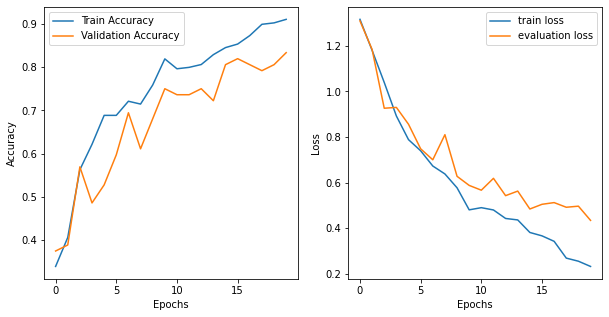

In [ ]:
#@title **code**. Predicción de muestra
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#@title **code** Modificamos el modelo, agregando capas extras
embedding_layer_1 = tf.keras.layers.Dense(256, activation='relu')
embedding_layer_2 = tf.keras.layers.Dense(128, activation='relu')
embedding_layer_p = tf.keras.layers.Dense(4, activation='softmax')

In [ ]:
#@title **code** Construimos el modelos y definimos que capas entrenar
model_A.trainable = False
transfer_model = tf.keras.Sequential(model_CNN.layers[:-1])
transfer_model.add(embedding_layer_1)
transfer_model.add(embedding_layer_2)
transfer_model.add(embedding_layer_p)
transfer_model.summary()
len(transfer_model.trainable_variables)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 dense (Dense)               (None, 4, 4, 64)          32832     
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             (None, 4, 4, 32)          2080      
                                                                 
 dense_2 (Dense)             (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d (G  (None, 16)               0         
 lobalAveragePooling2D)                                          
                                                      

12

In [ ]:
#@title **code** Entrenamiento

opt = tf.keras.optimizers.Adam(lr=learning_rate)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(train_generator, epochs=20,verbose=1, batch_size=32,validation_data=(validation_generator))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
7/7 [==============================] - 5s 735ms/step - loss: 0.5490 - accuracy: 0.7961 - val_loss: 0.5171 - val_accuracy: 0.7917
Epoch 2/20
7/7 [==============================] - 4s 568ms/step - loss: 0.1949 - accuracy: 0.9413 - val_loss: 0.5138 - val_accuracy: 0.8194
Epoch 3/20
7/7 [==============================] - 4s 559ms/step - loss: 0.1274 - accuracy: 0.9527 - val_loss: 0.4974 - val_accuracy: 0.8472
Epoch 4/20
7/7 [==============================] - 4s 570ms/step - loss: 0.1335 - accuracy: 0.9511 - val_loss: 0.5802 - val_accuracy: 0.8194
Epoch 5/20
7/7 [==============================] - 4s 578ms/step - loss: 0.1495 - accuracy: 0.9511 - val_loss: 0.5029 - val_accuracy: 0.8472
Epoch 6/20
7/7 [==============================] - 4s 671ms/step - loss: 0.1024 - accuracy: 0.9641 - val_loss: 0.5583 - val_accuracy: 0.8194
Epoch 7/20
7/7 [==============================] - 4s 580ms/step - loss: 0.0859 - accuracy: 0.9641 - val_loss: 0.4732 - val_accuracy: 0.8472
Epoch 8/20
7/7 [====

In [ ]:
#@title **code** afinamos algunas otras capas
model_A.trainable = True
print("Total ayers of model_B_on_A: ", len(model_A.layers))
for layer in model_A.layers[:19]:
  layer.trainable =  False

transfer_model.summary()
len(transfer_model.trainable_variables)

Total ayers of model_B_on_A:  22
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 dense (Dense)               (None, 4, 4, 64)          32832     
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             (None, 4, 4, 32)          2080      
                                                                 
 dense_2 (Dense)             (None, 4, 4, 16)          528       
                                                                 
 global_average_pooling2d (G  (None, 16)               0         
 lobalAveragePooling2D)                                          
                     

16

In [ ]:
#@title **code**  Compilamos el modelo
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(lr=learning_rate/500)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(train_generator, epochs=200,verbose=1, batch_size=32,validation_data=(validation_generator))


Epoch 1/200
7/7 [==============================] - 6s 627ms/step - loss: 0.0821 - accuracy: 0.9706 - val_loss: 0.4172 - val_accuracy: 0.8333
Epoch 2/200
7/7 [==============================] - 4s 574ms/step - loss: 0.0690 - accuracy: 0.9772 - val_loss: 0.4099 - val_accuracy: 0.8333
Epoch 3/200
7/7 [==============================] - 4s 570ms/step - loss: 0.0726 - accuracy: 0.9772 - val_loss: 0.3998 - val_accuracy: 0.8333
Epoch 4/200
7/7 [==============================] - 4s 547ms/step - loss: 0.0768 - accuracy: 0.9755 - val_loss: 0.3919 - val_accuracy: 0.8472
Epoch 5/200
7/7 [==============================] - 4s 554ms/step - loss: 0.0744 - accuracy: 0.9739 - val_loss: 0.3896 - val_accuracy: 0.8472
Epoch 6/200
7/7 [==============================] - 4s 576ms/step - loss: 0.0779 - accuracy: 0.9657 - val_loss: 0.3858 - val_accuracy: 0.8472
Epoch 7/200
7/7 [==============================] - 4s 569ms/step - loss: 0.0819 - accuracy: 0.9723 - val_loss: 0.3838 - val_accuracy: 0.8472
Epoch 8/200
7

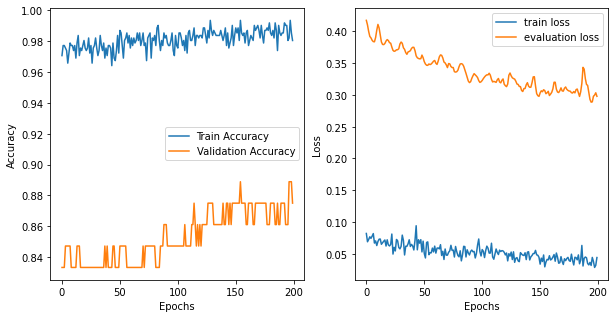

In [ ]:
#@title **code**. Predicción de muestra
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#@title **code** Evaluamos el modelo
transfer_model.evaluate(test_generator)

315/315 [==============================] - 44s 140ms/step - loss: 0.4951 - accuracy: 0.8413


[0.4951236844062805, 0.841269850730896]

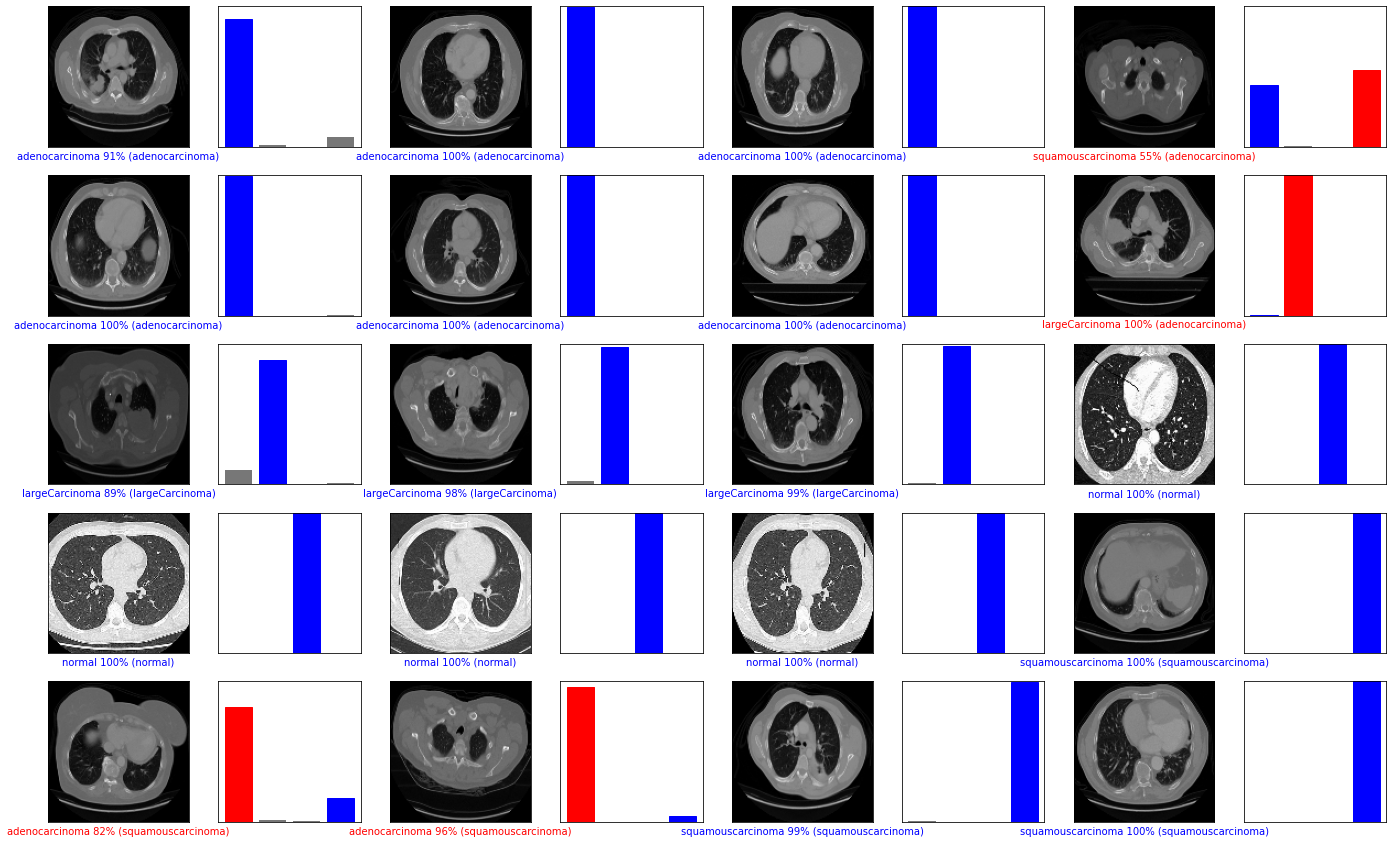

In [ ]:
#@title **code** Gráfica de predicciones
predictions = transfer_model.predict(imagenes_test)
labels_pred = np.argmax(predictions, axis=1)

class_names = ["adenocarcinoma", "largeCarcinoma", "normal","squamouscarcinoma"]

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(128, 128,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*3*num_cols, 3*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i*16, predictions, etiquetas_test, imagenes_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i*16, predictions, etiquetas_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


(315, 4)
matrix de confusión en test
 [[104   8   0   8]
 [  5  46   0   0]
 [  0   1  53   0]
 [ 27   1   0  62]]
verifica número de imágenes en total por fila
[120  51  54  90]


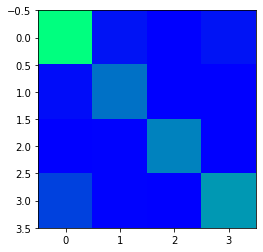

In [ ]:
#@title **code** Predicción
test_generator.reset() 
predictions = transfer_model.predict_generator(test_generator)
# predict the class label
#@title **Matriz De Confusion**
#@markdown Una mejor visión de que tan acertado fueron los valores predecidos con respecto a los valores reales en este caso de red neuronal (DNN), para tener una idea de la proporción entre:
#@markdown * Verdadero positivo
#@markdown * Verdadero negativo
#@markdown * Falso positivo
#@markdown * Falso negativo
from sklearn.metrics import confusion_matrix
print(predictions.shape)
labels_pred = np.argmax(predictions, axis=1)
cm_test = confusion_matrix(etiquetas_test, labels_pred)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))
plt.imshow(cm_test, cmap = "winter")

#**Autoencoder**

In [ ]:
#@title *code* Implementación encoder CNN 

input_img = tf.keras.layers.Input(shape=(128, 128, 3) ) 
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
l = tf.keras.layers.Flatten()(x)
encoded = tf.keras.layers.Dense(2048, activation='softmax')(l) 
#encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x) #  (4, 4, 8)  128-dimensional

In [ ]:
#@title *code* Implementación decoder CNN 
x = tf.keras.layers.Reshape((16,16,8))(encoded)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (1, 1), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_cnn = tf.keras.models.Model(input_img, decoded)

autoencoder_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 8)         584 

In [ ]:
#@title *code* Compilamos y entrenamos el autoencoder

opt = tf.optimizers.Adam(learning_rate = 0.001)
autoencoder_cnn.compile(optimizer=opt, loss=tf.keras.losses.MeanSquaredError())
autoencoder_cnn.fit(train_generator_autoencoder,epochs=100)

Epoch 1/100
7/7 [==============================] - 22s 3s/step - loss: 0.1052
Epoch 2/100
7/7 [==============================] - 21s 3s/step - loss: 0.1036
Epoch 3/100
7/7 [==============================] - 23s 3s/step - loss: 0.1021
Epoch 4/100
7/7 [==============================] - 21s 3s/step - loss: 0.0994
Epoch 5/100
7/7 [==============================] - 22s 3s/step - loss: 0.0964
Epoch 6/100
7/7 [==============================] - 22s 3s/step - loss: 0.0936
Epoch 7/100
7/7 [==============================] - 23s 4s/step - loss: 0.0888
Epoch 8/100
7/7 [==============================] - 21s 3s/step - loss: 0.0846
Epoch 9/100
7/7 [==============================] - 21s 3s/step - loss: 0.0802
Epoch 10/100
7/7 [==============================] - 21s 3s/step - loss: 0.0766
Epoch 11/100
7/7 [==============================] - 23s 3s/step - loss: 0.0735
Epoch 12/100
7/7 [==============================] - 21s 3s/step - loss: 0.0716
Epoch 13/100
7/7 [==============================] - 21s 3s/st

In [ ]:
#@title *code* Encoder para obtener el modelo

encoder = tf.keras.models.Model(input_img, encoded)
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 8)         584 

In [ ]:
#@title *code* Procesamiento imágenes originales

imagenes=[]
etiquetas=[]
for x,i in enumerate(dataAutoencoder):
  print(i,x)
  for j in os.listdir(NTrain+i):
    im = cv2.imread(NTrain+i+'/'+j)
    imagenes.append(im)
    etiquetas.append(x)


imagenes=np.array(imagenes).astype('float32') / 255.0
etiquetas=np.array(etiquetas)

adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib 0
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa 1
normal 2
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa 3


In [ ]:
#@title *code* Procesamiento imágenes test originales

imagenes_test=[]
etiquetas_test=[]
for x,i in enumerate(testdataAutoencoder):
  if i == 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa':
    i='normal'
  elif i=='normal':
    i='squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
  print(i,x)
  for j in os.listdir(NTest+i):
    im = cv2.imread(NTest+i+'/'+j)
    imagenes_test.append(im)
    etiquetas_test.append(x)
  
imagenes_test=np.array(imagenes_test).astype('float32') / 255.0
etiquetas_test=np.array(etiquetas_test)


adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib 0
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa 1
normal 2
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa 3


In [ ]:
#@title *code* Procesamiento Imagenes validación originales

imagenes_valid=[]
etiquetas_valid=[]
for x,i in enumerate(validationAutoencoder):
  print(i,x)
  for j in os.listdir(NValidation+i):
    im = cv2.imread(NValidation+i+'/'+j)
    imagenes_valid.append(im)
    etiquetas_valid.append(x)

imagenes_valid=np.array(imagenes_valid).astype('float32') / 255.0
etiquetas_valid=np.array(etiquetas_valid)

adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib 0
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa 1
normal 2
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa 3


In [ ]:
#@title *code* Obtenemos el embebido para cada set de imágenes

encoded_train=encoder.predict(imagenes)
encoded_test=encoder.predict(imagenes_test)
encoded_valid=encoder.predict(imagenes_valid)
predict=autoencoder_cnn.predict(imagenes_test)

In [ ]:
#@title *code* Shuffle a set de entrenamiento

from sklearn.model_selection import train_test_split

encoded_train, X_test, etiquetas, y_test = train_test_split(encoded_train,etiquetas,test_size=0.0001, random_state=21, shuffle=True)

In [ ]:
#@title **Gaussian  Naive Bayes**
#@markdown Se inicio usando el estimador mas básico visto en clase, imprime el accuracy y una pequeña muestra donde se muestra el valor verdadero y el valor predicho por el estimador.
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
est = GaussianNB()
est.fit(encoded_train, etiquetas)
p = est.predict(encoded_test)
a = accuracy_score(etiquetas_test,p)
print("Acuraccy Gaussian NB: ", a, "\nTrue: ",etiquetas_test[300:310],"\nPredictions: ", p[100:110])

Acuraccy Gaussian NB:  0.2761904761904762 
True:  [3 3 3 3 3 3 3 3 3 3] 
Predictions:  [0 0 1 0 0 0 1 0 0 0]


(315,)
matrix de confusión en test
 [[27 89  0  4]
 [ 5 42  0  4]
 [ 0  0 54  0]
 [31 53  0  6]]
verifica número de imágenes en total por fila
[120  51  54  90]


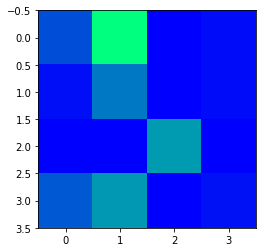

In [ ]:
#@title **code** Predicción
test_generator.reset() 
predictions = est.predict(encoded_test)
# predict the class label
#@title **Matriz De Confusion**
#@markdown Una mejor visión de que tan acertado fueron los valores predecidos con respecto a los valores reales en este caso de red neuronal (DNN), para tener una idea de la proporción entre:
#@markdown * Verdadero positivo
#@markdown * Verdadero negativo
#@markdown * Falso positivo
#@markdown * Falso negativo
from sklearn.metrics import confusion_matrix
print(predictions.shape)

cm_test = confusion_matrix(etiquetas_test,predictions)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))
plt.imshow(cm_test, cmap = "winter")

In [ ]:
#@title **SVC**
#@markdown En este caso utilizamos el RF para nuestro modelo haciendole algunos ajustes en sus hiperparametros buscando la mejor implementacion del estimador en nuestro problema

encoded_test
from sklearn.utils import shuffle
from sklearn.svm import SVC
svc = SVC(kernel='poly', degree=3)
svc.fit(encoded_train,etiquetas)
p = svc.predict(encoded_test)
a = accuracy_score(etiquetas_test,p)
print("Acuraccy SVC: ", a, "\nTrue: ",etiquetas_test[10:310],"\nPredictions: ", p[100:310])

Acuraccy Gaussian NB:  0.45396825396825397 
True:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3] 
Predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 0 2 0 2 0 2 2 0 2 0 0 0 2 0 2 2 2 0 0 0 2 0 2 0 2 0 0 0 0 2 2 0 2
 0 0 0 0 0 2 0 2 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0

(315,)
matrix de confusión en test
 [[120   0   0   0]
 [ 51   0   0   0]
 [ 31   0  23   0]
 [ 90   0   0   0]]
verifica número de imágenes en total por fila
[120  51  54  90]


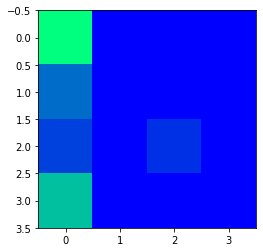

In [ ]:
#@title **code** Predicción
test_generator.reset() 
predictions = svc.predict(encoded_test)
# predict the class label
#@title **Matriz De Confusion**
#@markdown Una mejor visión de que tan acertado fueron los valores predecidos con respecto a los valores reales en este caso de , para tener una idea de la proporción entre:
#@markdown * Verdadero positivo
#@markdown * Verdadero negativo
#@markdown * Falso positivo
#@markdown * Falso negativo
from sklearn.metrics import confusion_matrix
print(predictions.shape)

cm_test = confusion_matrix(etiquetas_test,predictions)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))
plt.imshow(cm_test, cmap = "winter")

In [ ]:
imagenes_test.shape

(315, 128, 128, 3)

In [ ]:
nsamples, nx, ny, f = imagenes_test.shape
nsamples, nx, ny, f 
imagenes_test = imagenes_test.reshape(nsamples,nx*ny,f)

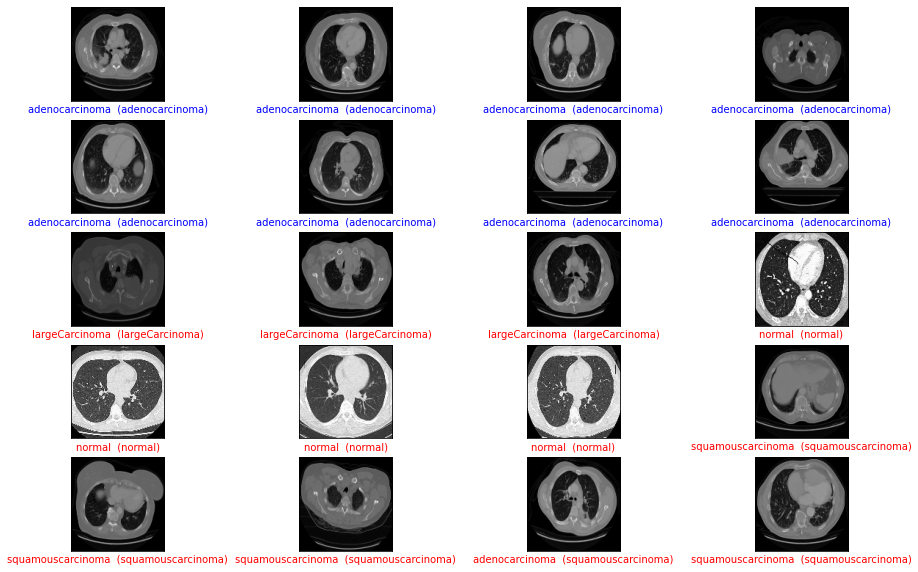

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#@title **Random Forest Classifier**
#@markdown En este caso utilizamos el RF para nuestro modelo haciendole algunos ajustes en sus hiperparametros buscando la mejor implementacion del estimador en nuestro problema


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class_names = ["adenocarcinoma", "largeCarcinoma", "normal","squamouscarcinoma"]

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(128, 128,3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{}  ({})".format(class_names[predictions_array],
                                class_names[true_label]),
                                color=color)
num_rows = 5
num_cols = 4
predictions = est.predict(encoded_test)
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i*16, predictions, etiquetas_test, imagenes_test)
 
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
accuracy_mayor = 0
for t in range(1):
  for depth in range(10,100,10):
    for n in range(4,101,2):
      est = RandomForestClassifier(n_estimators=n, max_depth=depth)
      est.fit(encoded_train, etiquetas)
      p = est.predict(encoded_test)
      a = accuracy_score(etiquetas_test,p)
      if a > accuracy_mayor:
        accuracy_mayor= a
        depth_mayor= depth
        n_mayor = n
        etiquetas_test_mejor = etiquetas_test[:20]
        predicciones_mejor = p[:20]
      print(f"Accuracy (Max_depth = {depth}, N_estimators = {n}) : {a}\n True: {etiquetas_test[300:310]}, predicho: {p[300:310]}"  )
  print(f" La Mejor Configuracion: Accuracy (Max_depth = {depth_mayor}, N_estimators = {n_mayor}) : {accuracy_mayor}\n True: {etiquetas_test_mejor}, predicho: {predicciones_mejor}"  )

Accuracy (Max_depth = 10, N_estimators = 4) : 0.4158730158730159
 True: [3 3 3 3 3 3 3 3 3 3], predicho: [3 3 0 0 0 3 2 2 3 0]
Accuracy (Max_depth = 10, N_estimators = 6) : 0.3904761904761905
 True: [3 3 3 3 3 3 3 3 3 3], predicho: [0 0 0 0 3 3 1 1 0 1]
Accuracy (Max_depth = 10, N_estimators = 8) : 0.38412698412698415
 True: [3 3 3 3 3 3 3 3 3 3], predicho: [0 0 0 0 3 0 1 1 3 1]
Accuracy (Max_depth = 10, N_estimators = 10) : 0.43174603174603177
 True: [3 3 3 3 3 3 3 3 3 3], predicho: [3 0 0 0 3 0 1 1 3 0]
Accuracy (Max_depth = 10, N_estimators = 12) : 0.3746031746031746
 True: [3 3 3 3 3 3 3 3 3 3], predicho: [0 0 0 0 0 0 1 1 0 0]
Accuracy (Max_depth = 10, N_estimators = 14) : 0.4031746031746032
 True: [3 3 3 3 3 3 3 3 3 3], predicho: [0 1 0 0 0 0 1 1 0 0]
Accuracy (Max_depth = 10, N_estimators = 16) : 0.39365079365079364
 True: [3 3 3 3 3 3 3 3 3 3], predicho: [0 3 0 0 0 0 1 1 0 0]
Accuracy (Max_depth = 10, N_estimators = 18) : 0.40634920634920635
 True: [3 3 3 3 3 3 3 3 3 3], predich

(315,)
matrix de confusión en test
 [[36 55  0 29]
 [21 19  0 11]
 [ 0  0 54  0]
 [53 21  0 16]]
verifica número de imágenes en total por fila
[120  51  54  90]


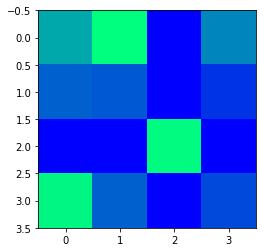

In [ ]:
#@title **code** Predicción
test_generator.reset() 
predictions = est.predict(encoded_test)
# predict the class label
#@title **Matriz De Confusion**
#@markdown Una mejor visión de que tan acertado fueron los valores predecidos con respecto a los valores reales en este caso de , para tener una idea de la proporción entre:
#@markdown * Verdadero positivo
#@markdown * Verdadero negativo
#@markdown * Falso positivo
#@markdown * Falso negativo
from sklearn.metrics import confusion_matrix
print(predictions.shape)

cm_test = confusion_matrix(etiquetas_test,predictions)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))
plt.imshow(cm_test, cmap = "winter")